<a href="https://colab.research.google.com/github/imanekn/Fake-News-Detection/blob/main/fake_news_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import string
import re
import nltk

In [3]:
data = pd.read_excel('/content/Data-FakeRealCOVID.xlsx')

In [4]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


### **Exploring Data**


In [5]:
data.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


In [6]:
#Check if there are any missing values
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

### **Plotting**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6,5)})

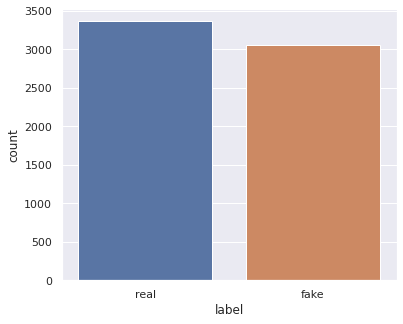

In [8]:
sns.countplot(x='label', data=data)

### **Cleaning Data**

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [10]:
#importing necessary packages
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer

In [11]:
#Stemmer
port_stem = PorterStemmer()

We'll use the function below to clean text

In [12]:
def preprocess(text):
  
    port_stem = PorterStemmer()
    stop_words = stopwords.words('english')
    
    #to lowercase
    text = text.lower()
    #Removing links
    text = re.sub(r'https\S+', '', text, flags=re.MULTILINE)
    #Removing usernames
    text = re.sub(r'@\S+', '', text, flags=re.MULTILINE)
    #Removing hashtags
    text = re.sub(r'#\S+', '', text, flags=re.MULTILINE)
    #Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #Removing all non alphanumeric characters and numbers
    text = re.sub('[^a-zA-Z]+', ' ', text) 
    #stemming
    text = [port_stem.stem(word) for word in text.split() if not word in stopwords.words('english') and len(word)>2]
    text = ' '.join(text)
  
    return text

We'll use the function below to apply the preprocess function to a dataframe rows

In [13]:
def data_preprocess(x):
    x = x.apply(lambda x : preprocess(x))

    y = x.copy(deep=True)
    for i in range(y.shape[0]):
        y[i] = "".join(x[i])

    return y

In [15]:
data = pd.read_excel('/content/Data-FakeRealCOVID.xlsx')

In [16]:
preprocess("https/hgjjfdnkjgn #imane @imane , I read a book with 7 pages")

'read book page'

In [17]:
#Applying data_preprocess to our dataframe tweets
data["tweet"] = data_preprocess(data["tweet"])
data["tweet"]

0       cdc current report death gener discrep death c...
1       state report death small rise last tuesday sou...
2       polit correct woman almost use pandem excus re...
3                  test laboratori india august test done
4       popul state gener larg case count look new cas...
                              ...                        
6415      tiger test posit covid pleas stay away pet bird
6416    autopsi prove covid blood clot pneumonia ought...
6417    post claim covid vaccin alreadi develop caus w...
6418                    aamir khan donat relief care fund
6419    day sinc last case covid acquir local unknown ...
Name: tweet, Length: 6420, dtype: object

In [18]:
#Loading preprocessed data
data.to_csv("Data-FakeRealCOVID1.csv", index=False)

### **Features Extraction**

In [19]:
df = pd.read_csv("Data-FakeRealCOVID1.csv")

In [20]:
#importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [21]:
#Checking if there are any NaN values
df[df.isnull().any(axis=1)]

,id,tweet,label
4286,4287,NaN,fake
4697,4698,NaN,fake


In [22]:
#Dropping rows with Nan values
df = df.dropna()

In [23]:
X = df['tweet']
Y = df['label']

In [24]:
#Replacing "true" by 1 and "fake" by 0
df["label"].replace({"real": 1, "fake": 0}, inplace=True)

In [25]:
#TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 
X = tfidf_vectorizer.fit_transform(X).toarray()


In [26]:
#Transforming label column to numpy
label = Y.to_numpy()
label

array([1, 1, 0, ..., 0, 0, 1])

In [27]:

array = np.c_[X]

In [28]:
#Getting features names
features_names = tfidf_vectorizer.get_feature_names_out() 

In [29]:
df1 = pd.DataFrame(X, index=[0+i for i in range(6418)], columns=features_names)

In [30]:
df1.to_csv('features.csv' , index=False)

### **Model**

In [31]:
df = pd.read_csv('features.csv')

In [32]:
df.head()

,aaj,aamir,aamp,aaradhya,ababa,abacha,abakaliki,abandon,abat,abbasi,...,zomato,zombi,zone,zonecityspecif,zoo,zookeep,zoolog,zoom,zydu,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#importing necessary packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [34]:
data = torch.tensor(df.to_numpy())

In [35]:
data

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4864, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)

In [36]:
df.head()

,aaj,aamir,aamp,aaradhya,ababa,abacha,abakaliki,abandon,abat,abbasi,...,zomato,zombi,zone,zonecityspecif,zoo,zookeep,zoolog,zoom,zydu,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
y = label
y

array([1, 1, 0, ..., 0, 0, 1])

In [38]:
#from array to tensor
targets = torch.tensor(y)
targets

tensor([1, 1, 0,  ..., 0, 0, 1])

In [39]:
#Splitting data to test and train
X_train,X_test,y_train,y_test = train_test_split(data,targets,test_size=0.2)

In [40]:
X_train.shape

torch.Size([5134, 7942])

In [41]:
X_test.shape

torch.Size([1284, 7942])

In [42]:
#Splitting data to train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [43]:
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
X_val = torch.tensor(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [45]:
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)
y_val = torch.tensor(y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
y_train = y_train.to(torch.float32)
y_test = y_test.to(torch.float32)
y_val = y_val.to(torch.float32)


In [47]:
#Creating MyDataset class inheriting from Dataset 
class MyDataset(Dataset):
    def __init__(self, data, targets):
        super(MyDataset, self)
        self.data = data
        self.targets = targets
        
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)

In [48]:
#Instanciation of 3 objects for traing, test and validation data and targets 
train_dataset = MyDataset(X_train,y_train)
val_dataset = MyDataset(X_val,y_val)
test_dataset = MyDataset(X_test,y_test)

In [49]:
batch_size = 64

In [50]:
#Importing DataLoader
from torch.utils.data import DataLoader

In [51]:
#Creating DataLoader objects for training, test and validation datasets
train_Dataloader = DataLoader(train_dataset , batch_size)
val_Dataloader = DataLoader(val_dataset , batch_size)
test_Dataloader = DataLoader(test_dataset , batch_size)

In [52]:
len(train_Dataloader.dataset)

3850

In [53]:
#Creating MyNN class inheriting from nn.Module
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN,self).__init__()
        self.input_layer = nn.Linear(7942, 64)
        self.hidden_layer = nn.Linear(64,32)
        self.output_layer = nn.Linear(32,2)
    
    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        return self.output_layer(x)
 

In [54]:
#Instanciating our NN
model = MyNN()
model

MyNN(
  (input_layer): Linear(in_features=7942, out_features=64, bias=True)
  (hidden_layer): Linear(in_features=64, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=2, bias=True)
)

# Model training

In [55]:
# Defining our loss function. We'll use CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

In [56]:
import torch.optim as optim

In [57]:
# Loss optimizer function,and defining the learning rate.
#optimizer = optim.Adadelta(model.parameters(), lr=100)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [58]:
def training_model(nb_epochs):
    for i in range(nb_epochs):
        # Training
        model.train()
        # initialising train_loss
        train_loss = 0
        # loop on training dataset minibatches
        for data,targets in train_Dataloader:    
            # predicted labels' vector 
            output = model(data.float())
            # Calculating loss by comparing predicted labels and current minibatch targets 
            loss = loss_function(output,targets.long())
            # Backpropagation: 
            
            optimizer.zero_grad()
            # backpropagation
            loss.backward()
            # Optimizer step
            optimizer.step()
            # Updating training loss by adding data batch's loss
            train_loss += loss.item()
        # A la sortie de la boucle de l'entraînement, on calcule le coût moyen pour toutes les données training
        train_loss /= len(train_dataset)
        #Validating loop
        # initialising valid loss
        valid_loss = 0
        # initialising right predictions
        correct = 0
        # Evaluating mode
        model.eval()
        # No gradient descent
        with torch.no_grad():
            # loop on validation dataset's minibatches
            for data,targets in val_Dataloader:  
               
                output = model(data.float())
                # Calculating loss by comparing predicted labels and current minibatch targets 
                loss = loss_function(output,targets.long())
                # Updating training loss by adding data batch's loss
                valid_loss += loss.item()
                
                correct += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            
            valid_loss /= len(val_dataset)
          
            correct = correct/len(val_dataset)
            
            print(f"epoch: {i+1}, train loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}, correct predictions: {correct*100:.2f}%")
            
        



In [59]:
training_model(9)

epoch: 1, train loss: 0.0098, validation loss: 0.0077, correct predictions: 91.43%
epoch: 2, train loss: 0.0039, validation loss: 0.0039, correct predictions: 92.45%
epoch: 3, train loss: 0.0013, validation loss: 0.0041, correct predictions: 91.12%
epoch: 4, train loss: 0.0006, validation loss: 0.0046, correct predictions: 90.73%
epoch: 5, train loss: 0.0003, validation loss: 0.0050, correct predictions: 90.65%
epoch: 6, train loss: 0.0002, validation loss: 0.0054, correct predictions: 90.65%
epoch: 7, train loss: 0.0001, validation loss: 0.0057, correct predictions: 90.97%
epoch: 8, train loss: 0.0001, validation loss: 0.0059, correct predictions: 90.97%
epoch: 9, train loss: 0.0000, validation loss: 0.0061, correct predictions: 90.73%


# Testing Model

In [60]:
test_loss = 0

correct = 0
with torch.no_grad():
    for data,targets in test_Dataloader:  
        output = model(data.float())
        loss = loss_function(output,targets.long())
        test_loss += loss.item()
        correct += torch.sum((torch.argmax(output, dim=1) == targets)).item()
    
    test_loss /= len(test_dataset)
    test_accuracy = correct/len(test_dataset)

In [61]:
test_accuracy

0.9003115264797508

In [62]:
#Applying tfidf on tweet
def tfidf(tweet) : 
        tweet= preprocess(tweet) 
        tfidf_enc = tfidf_vectorizer.transform([tweet])
        tfidf_enc_array = tfidf_enc.toarray()
          
        return tfidf_enc_array

In [63]:
#fuction predicting if a tweet is real or fake
def predict(text):
      with torch.no_grad():
        #vectorizing   
        vect=tfidf(text) 
        #Converting to tensor
        test= torch.tensor(vect,dtype=torch.float) 
        output = model.forward(test) 
        return output

In [64]:
from sklearn.preprocessing import LabelEncoder
def news(text):
    encoder = LabelEncoder()
    encoder.fit(y_train)
    encoder.fit(y_test)
    encoded_Y_test = encoder.transform(y_test)
    encoded_Y_train = encoder.transform(y_train)
    preprocessed_text=preprocess(text)
    prediction=predict(preprocessed_text)
    return  prediction


In [65]:
def make_prediction(text):
    res=news(text)
    encoder = LabelEncoder()
    encoder.fit(y_train)
    encoder.fit(y_test)
    encoded_Y_test = encoder.transform(y_test)
    encoded_Y_train = encoder.transform(y_train)
    if (encoder.classes_[np.argmax(res)]==1):
        return 'real'
    if(encoder.classes_[np.argmax(res)]==0): 
        return 'fake'

In [66]:
make_prediction("The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.")

'real'

In [67]:
from tkinter import *
from tkinter import ttk,messagebox
from PIL import Image,ImageTk
import numpy as np

class Entries:
    def __init__(self,root):
        self.root  = root
        blank_space ="  "
        self.root.title(30*blank_space+"Fake news detection")
        self.root.geometry("500x250")

    
        self.bg = ImageTk.PhotoImage(file="C:\\Users\\dcij\\Desktop\\Projet IA\\img.jpg")
        bg = Label(self.root,image=self.bg).place(x=0,y=0,relwidth=1,relheight=1)

        label1 = Label(self.root, text="Enter your tweet:",font=('Times (Body)',10,"bold"),fg="black")
        label1.place(x=25,y=60)
      

        e = ttk.Entry(self.root,justify = CENTER)
        e.place(x=175,y=60,width=200,height=30)
       
        def display_results(twt):
            my_window = Tk()
            blank_space ="  "
            my_window.title(30*blank_space+"Fake news detection")
            my_window.geometry("500x250")
            string_todisplay = make_prediction(twt)
            
            my_window.bg = ImageTk.PhotoImage(file="C:\\Users\\dcij\\Desktop\\Projet IA\\img.jpg")
            bg = Label(my_window,image=my_window.bg).place(x=0,y=0,width=1,height=1)
            
            #my_window.bg1 = ImageTk.PhotoImage(file="C:\\Users\\dcij\\Desktop\\Projet IA\\img.jpg")
            #bg1 = Label(my_window,image=my_window.bg).place(x=0,y=0,relwidth=1,relheight=1)

            label2 = Label(my_window, text="Prediction result : ",font=('Times (Body)',15,"bold"),fg="black")
            label2.place(x=25,y=40)
            label1 = Label(my_window, text=string_todisplay,font=('Times (Body)',15,"bold"),fg="black")
            label1.place(x=300,y=40)
            
        def entry1():
            try:
                tweet_to_verify = e.get()
                self.root.destroy()
                display_results(tweet_to_verify)

            except ValueError:
                messagebox.showerror("Error","erreur!!",parent=self.root)
                messagebox.showerror("Error","Please enter valid news!",parent=self.root)

        def reset():
            e.delete(0,END)
      
        myButton1 = Button(self.root, text="Reset",bd=0,cursor="hand2",font=('Times (Body)',10,"bold"),fg="black",width=10, command=reset)
        myButton1.place(x=300,y=140)

        myButton2 = Button(self.root, text="Predict",bd=0,cursor="hand2",font=('Times (Body)',10,"bold"),fg="black",width=10, command=entry1)
        myButton2.place(x=75,y=140)

root = Tk()
obj = Entries(root)
root.mainloop()  


TclError: ignored